###  For RESET

In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

# Data 1: Credit Card 
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

https://datahub.io/machine-learning/creditcard

In [3]:
data_original = pd.read_csv(r"C:\Users\Home\Jupyter\Datasets\creditcard.csv")
data_original.drop(columns = "Time",axis = 1,inplace = True)
data_original =data_original.round(3)
#data_original.columns

In [4]:
data_synthetic = pd.read_csv(r"C:\Users\Home\Jupyter\VAE_Synthetic_Data.csv")
data_synthetic.drop(columns = "Unnamed: 0",axis = 1,inplace = True)

data_synthetic =data_synthetic.round(3)
data_synthetic.Class =data_synthetic.Class.round(0)
data_synthetic[data_synthetic.Class < 0] = 0
data_synthetic.Class =data_synthetic.Class.astype(np.int64)

In [5]:
data_original.Class.unique(),data_original.Class.info(),data_synthetic.Class.unique(),data_synthetic.Class.info()

<class 'pandas.core.series.Series'>
RangeIndex: 284807 entries, 0 to 284806
Series name: Class
Non-Null Count   Dtype
--------------   -----
284807 non-null  int64
dtypes: int64(1)
memory usage: 2.2 MB
<class 'pandas.core.series.Series'>
RangeIndex: 68747 entries, 0 to 68746
Series name: Class
Non-Null Count  Dtype
--------------  -----
68747 non-null  int64
dtypes: int64(1)
memory usage: 537.2 KB


(array([0, 1], dtype=int64), None, array([0, 1], dtype=int64), None)

In [6]:
data_original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.62,0
1,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.69,0
2,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.66,0
3,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.50,0
4,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881,10.072,-9.835,-2.067,-5.364,-2.607,-4.918,7.305,1.914,4.356,...,0.213,0.112,1.014,-0.509,1.437,0.250,0.944,0.824,0.77,0
284803,-0.733,-0.055,2.035,-0.739,0.868,1.058,0.024,0.295,0.585,-0.976,...,0.214,0.924,0.012,-1.016,-0.607,-0.395,0.068,-0.054,24.79,0
284804,1.920,-0.301,-3.250,-0.558,2.631,3.031,-0.297,0.708,0.432,-0.485,...,0.232,0.578,-0.038,0.640,0.266,-0.087,0.004,-0.027,67.88,0
284805,-0.240,0.530,0.703,0.690,-0.378,0.624,-0.686,0.679,0.392,-0.399,...,0.265,0.800,-0.163,0.123,-0.569,0.547,0.109,0.105,10.00,0


In [7]:
data_synthetic

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.979,-0.058,0.641,0.362,-0.829,-0.210,-0.085,0.173,0.119,0.140,...,-0.078,-0.160,0.138,-0.019,0.240,0.051,-0.080,-0.068,60.163,0
1,-1.222,0.544,0.658,-0.467,0.512,-0.404,0.878,0.192,-0.536,-0.363,...,-0.074,0.039,-0.104,0.050,-0.235,-0.043,0.109,0.047,63.899,0
2,1.898,-0.577,-1.049,0.386,-0.251,-0.641,-0.197,0.005,0.447,0.205,...,-0.060,0.088,-0.014,0.129,0.197,0.050,-0.014,0.008,89.232,0
3,-0.624,-0.271,-0.086,0.009,2.587,4.570,-0.497,1.057,0.344,-0.083,...,0.024,-0.469,-0.482,1.450,0.251,0.062,-0.084,-0.042,146.501,0
4,-1.328,0.483,1.084,0.293,1.898,1.573,-0.145,0.402,-0.362,0.186,...,-0.095,-0.145,0.192,0.175,-0.081,0.057,0.129,0.350,63.017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68742,0.175,0.658,0.711,2.123,0.310,0.441,0.126,0.314,-0.090,0.223,...,-0.034,0.029,0.112,0.037,0.003,0.113,0.148,0.072,48.818,0
68743,1.266,-1.158,0.680,-0.230,-1.453,0.371,-1.120,0.223,0.182,0.317,...,-0.027,0.236,0.151,-0.041,0.160,-0.067,0.111,0.044,117.371,0
68744,-0.117,0.378,0.722,-0.368,0.115,-0.454,0.392,0.177,-0.156,-0.133,...,-0.047,-0.024,0.142,0.010,-0.016,-0.000,-0.008,0.030,45.800,0
68745,1.054,-0.185,0.382,0.218,-0.501,-0.403,-0.293,0.082,0.221,-0.021,...,-0.139,-0.195,0.199,-0.006,0.201,0.064,0.023,0.036,49.084,0


# 1. Visual Evaluation

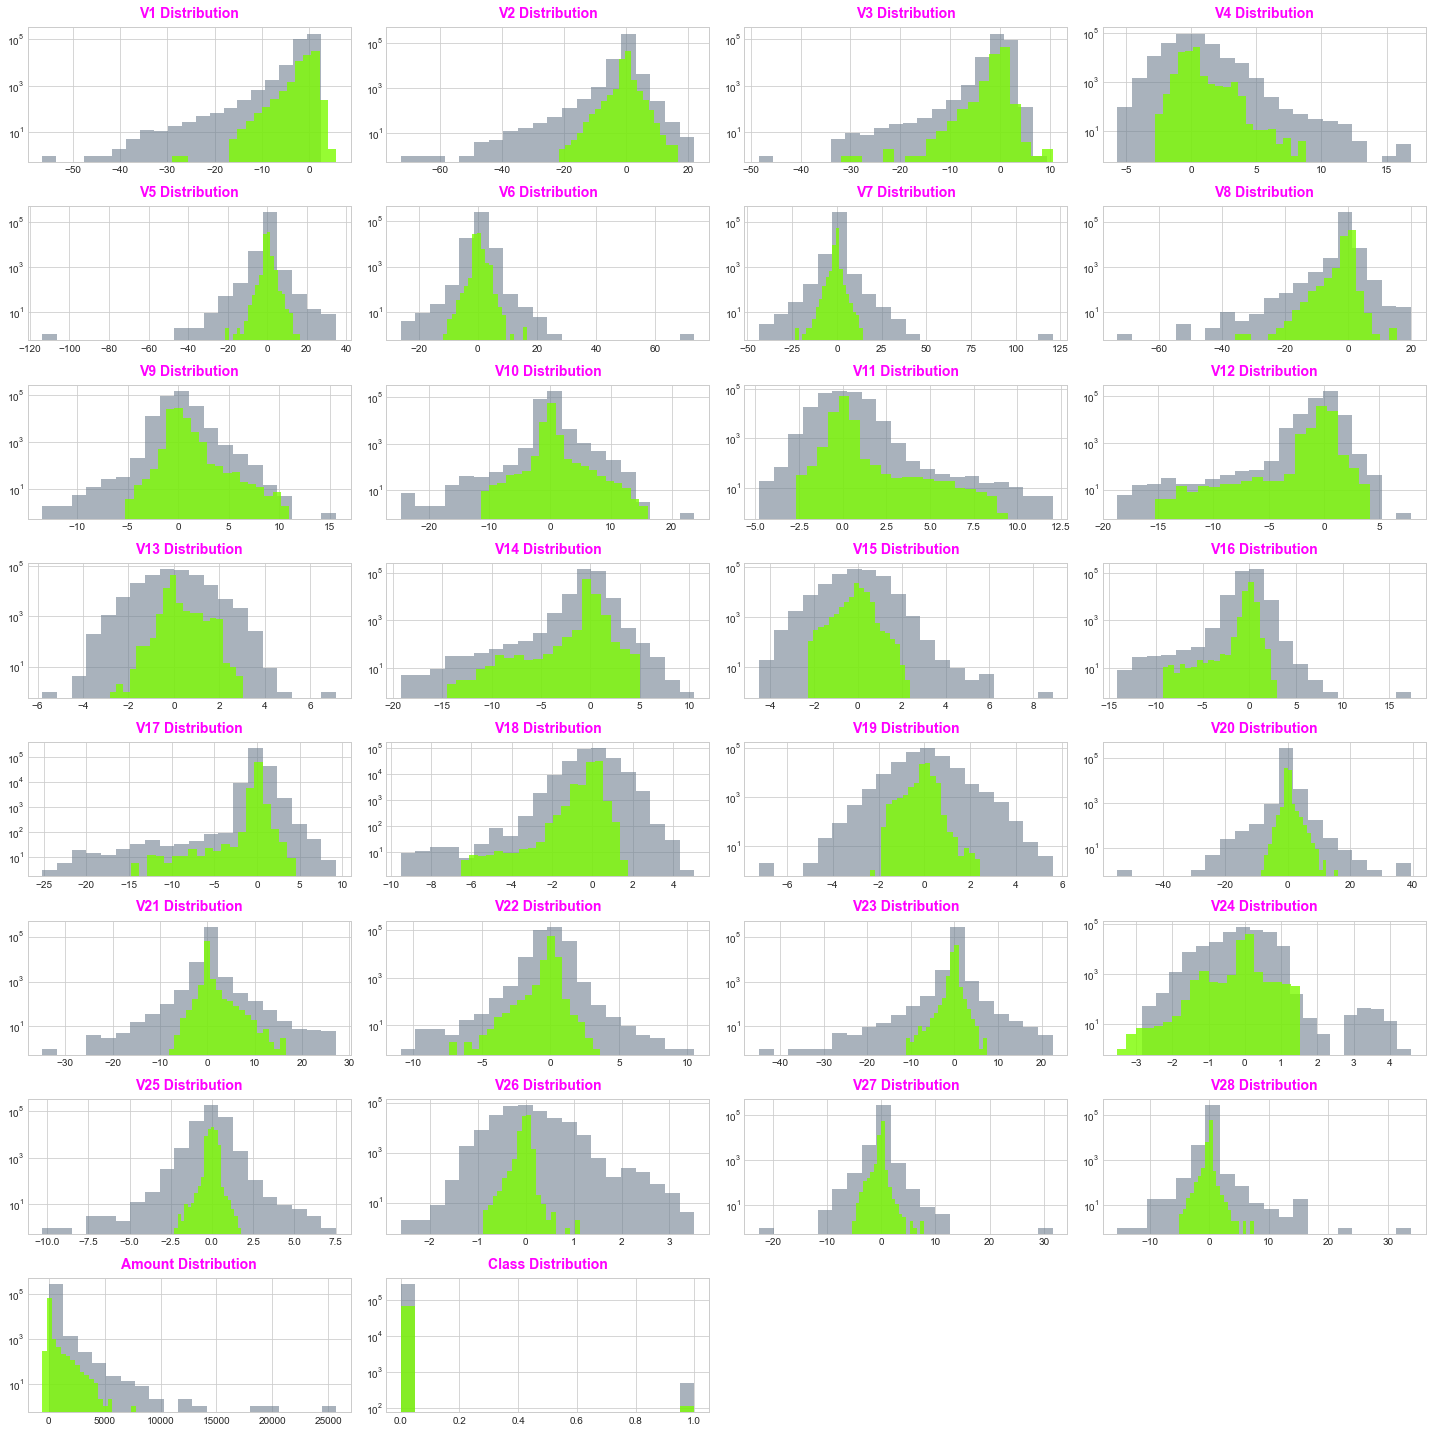

In [8]:
def histogram_comparison(dataframe1, features, rows, cols,facecolor1,dataframe2,facecolor2):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe1[feature].hist(bins=20,ax=ax,facecolor= facecolor1,alpha = 0.6)
        dataframe2[feature].hist(bins=20,ax=ax,facecolor= facecolor2,alpha = 0.8)
        ax.set_title(feature+" Distribution",color='fuchsia')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
    
histogram_comparison(data_original,data_original.columns,8,4, "slategrey",
                data_synthetic,"lawngreen")

from table_evaluator import load_data, TableEvaluator

print(data_original.shape, data_synthetic.shape)
table_evaluator =  TableEvaluator(data_original, data_synthetic)#, cat_cols= discrete_columns)

table_evaluator.visual_evaluation()

# Quantifying Distributions 

## 1(a). Comparing Standard Deviations for all columns of Synthetic and Real Data

In [9]:
# Standard Deviations for Real Data
columns_list = np.array(data_original.columns)
columns_list
original_data_std= pd.DataFrame(columns=columns_list)
for i in columns_list:
    original_data_std.loc[0,[i]] = data_original[i].std()
original_data_std= original_data_std.T
original_data_std.rename(columns={ original_data_std.columns[0]: "original_data_std" }, inplace = True)

In [10]:
# Standard Deviations for Synthetic Data
columns_list = np.array(data_synthetic.columns)
columns_list
data_synthetic_std= pd.DataFrame(columns=columns_list)
for i in columns_list:
    data_synthetic_std.loc[0,[i]] = data_synthetic[i].std()
data_synthetic_std = data_synthetic_std.T
data_synthetic_std.rename(columns={ data_synthetic_std.columns[0]: "data_synthetic_std" }, inplace = True)

In [11]:
combined_std = pd.concat([original_data_std,data_synthetic_std],axis = 1)
combined_std

,original_data_std,data_synthetic_std
V1,1.958696,1.756069
V2,1.651308,1.424734
V3,1.516256,1.086452
V4,1.415869,0.808582
V5,1.380247,1.089137
V6,1.332272,1.096188
V7,1.237092,0.999005
V8,1.194353,1.018453
V9,1.098631,0.764003
V10,1.08885,0.827513


In [12]:
combined_std.drop(labels=["Amount","Class"],inplace= True)
combined_std

,original_data_std,data_synthetic_std
V1,1.958696,1.756069
V2,1.651308,1.424734
V3,1.516256,1.086452
V4,1.415869,0.808582
V5,1.380247,1.089137
V6,1.332272,1.096188
V7,1.237092,0.999005
V8,1.194353,1.018453
V9,1.098631,0.764003
V10,1.08885,0.827513


<AxesSubplot:>

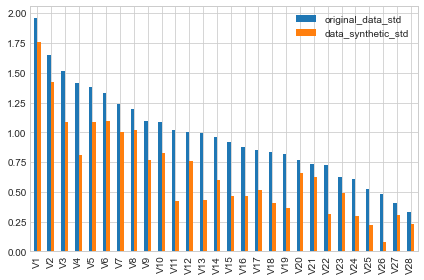

In [13]:
combined_std.plot(kind= 'bar')

## 1(b). Comparing Mean of columns between Original and Synthetic Dataset 

In [14]:
columns_list = np.array(data_original.columns)
columns_list
original_data_mean= pd.DataFrame(columns=columns_list)
for i in columns_list:
    original_data_mean.loc[0,[i]] = data_original[i].mean()
original_data_mean= original_data_mean.T
original_data_mean.rename(columns={ original_data_mean.columns[0]: "original_data_mean" }, inplace = True)

In [15]:
columns_list = np.array(data_synthetic.columns)
columns_list
data_synthetic_mean= pd.DataFrame(columns=columns_list)
for i in columns_list:
    data_synthetic_mean.loc[0,[i]] = data_synthetic[i].mean().round(decimals = 3)
data_synthetic_mean = data_synthetic_mean.T
data_synthetic_mean.rename(columns={ data_synthetic_mean.columns[0]: "data_synthetic_mean" }, inplace = True)

In [16]:
combined_mean = pd.concat([original_data_mean,data_synthetic_mean],axis = 1)
combined_mean

,original_data_mean,data_synthetic_mean
V1,0.0,-0.005
V2,-0.0,-0.003
V3,-0.000001,0.0
V4,0.0,0.005
V5,-0.0,-0.003
V6,-0.000001,0.008
V7,-0.000001,-0.005
V8,0.0,0.003
V9,-0.0,0.01
V10,0.0,-0.002


<AxesSubplot:>

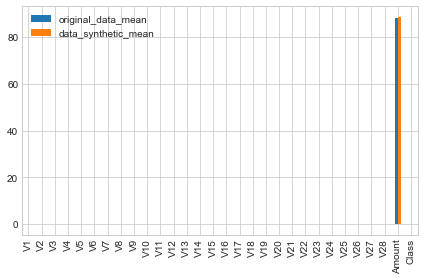

In [17]:
combined_mean.plot(kind= 'bar')

## 1(c). Column Corellation is already calculated via Table Evaluator

Heatmap for Original Data

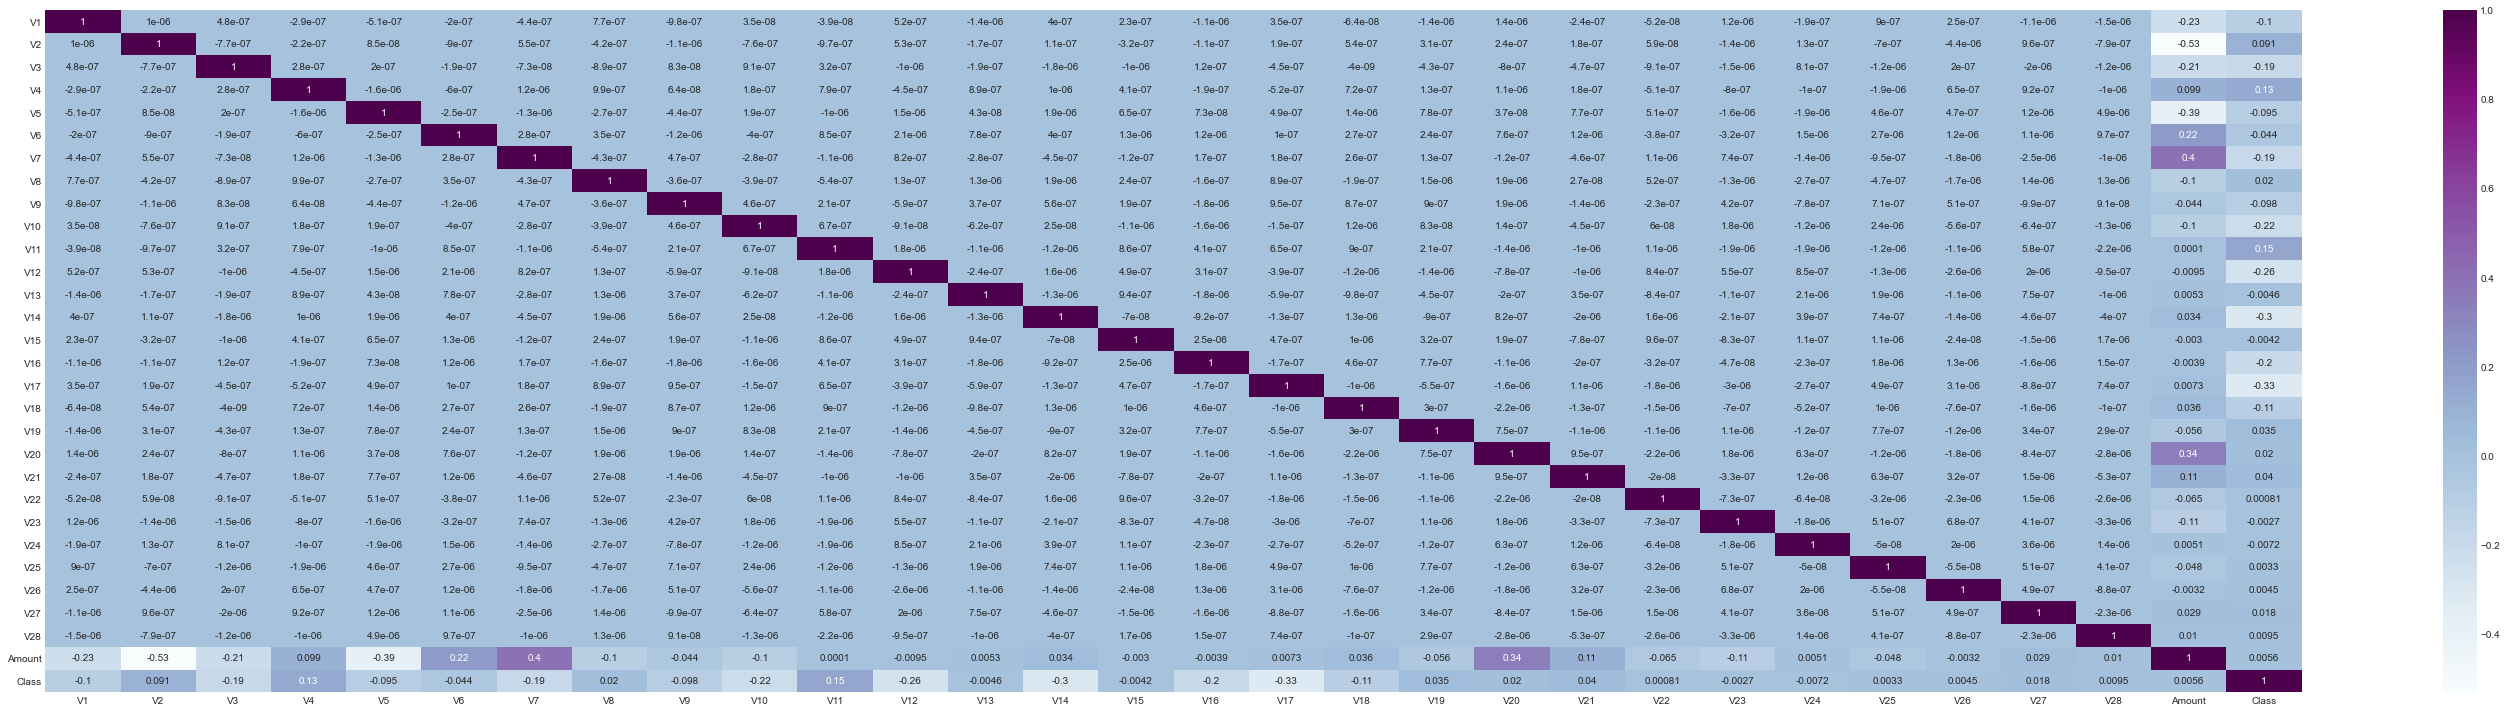

In [18]:
plt.figure(figsize = (40,10))
sns.heatmap(data_original.corr(), annot = True, cmap="BuPu")
plt.show()

Heatmap for Synthetic Data

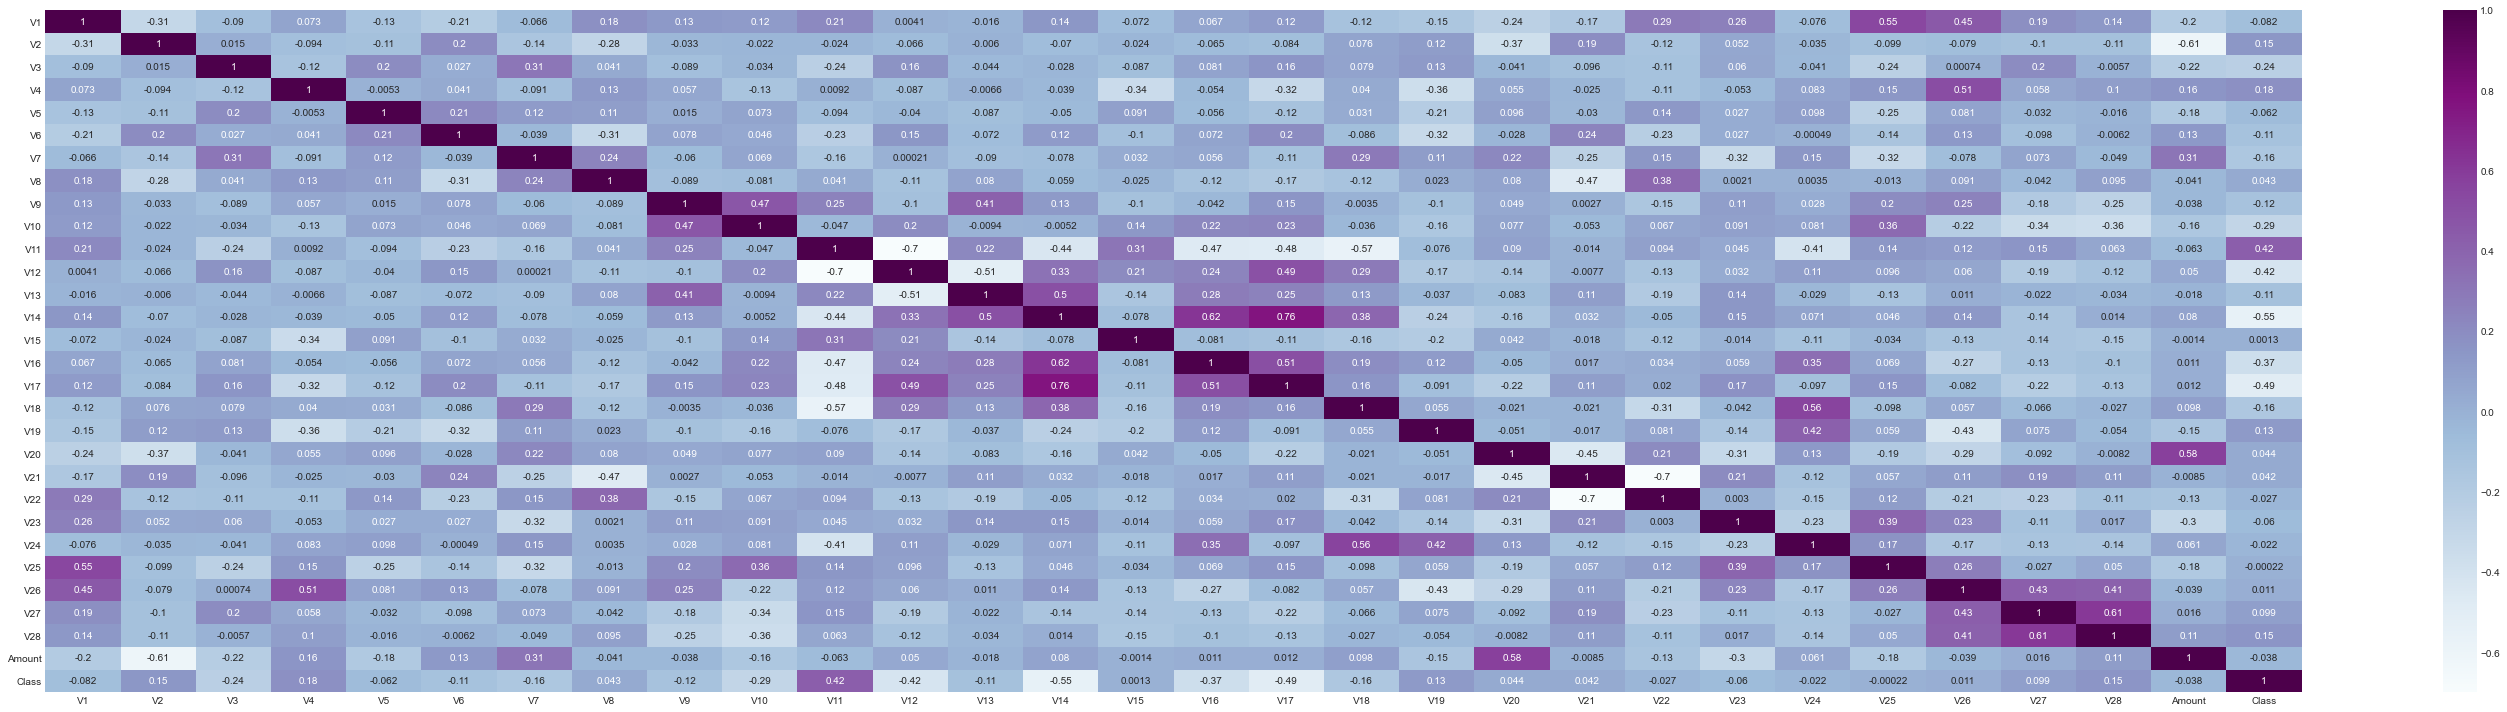

In [19]:
plt.figure(figsize = (40,10))
sns.heatmap(data_synthetic.corr(), annot = True, cmap="BuPu")
plt.show()

0    99.827251
1     0.172749
Name: Class, dtype: float64


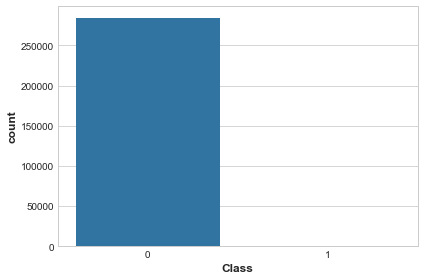

In [20]:
#For Original Data
sns.countplot(data_original['Class'])
print((data_original['Class'].value_counts()/data_original.shape[0])*100)

0    99.834175
1     0.165825
Name: Class, dtype: float64


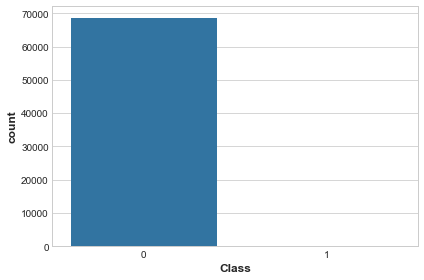

In [21]:
#For Synthetic Data
sns.countplot(data_synthetic['Class'])
print((data_synthetic['Class'].value_counts()/data_synthetic.shape[0])*100)

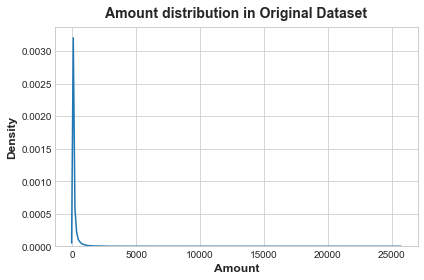

In [22]:
sns.kdeplot(x='Amount', data=data_original)
plt.title('Amount distribution in Original Dataset')
plt.show()

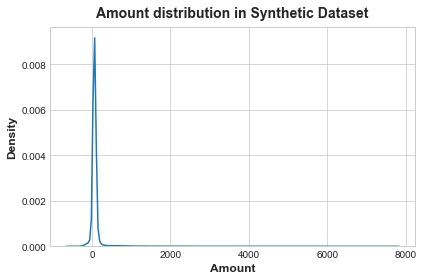

In [23]:
sns.kdeplot(x='Amount', data=data_synthetic)
plt.title('Amount distribution in Synthetic Dataset')
plt.show()

# To Do:

# 2. Statistical Similarity using Table wise Relationships across cols. in each table
## 2(1). Data Reduction Metric
## 2(2). Clustering Metric
## 2(3). Mirror Column Correl.
## 2(4). Can GAN be used as base line??

https://harvard-iacs.github.io/2019-CS109B/labs/lab10/VAE/

Read after 50%, https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73


# Synthetic Data Utility Framework: Replication of Analysis

# Build Decision Tree

## To Do: Check HPS tuning????

In [24]:
# Data wrangling 
import pandas as pd 

# Train test spliting 
from sklearn.model_selection import train_test_split

# Importing the sklearn implementation 
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Precision metrics 
from sklearn.metrics import mean_absolute_error


# Plotting 
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn import utils

In [25]:
data_synthetic

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.979,-0.058,0.641,0.362,-0.829,-0.210,-0.085,0.173,0.119,0.140,...,-0.078,-0.160,0.138,-0.019,0.240,0.051,-0.080,-0.068,60.163,0
1,-1.222,0.544,0.658,-0.467,0.512,-0.404,0.878,0.192,-0.536,-0.363,...,-0.074,0.039,-0.104,0.050,-0.235,-0.043,0.109,0.047,63.899,0
2,1.898,-0.577,-1.049,0.386,-0.251,-0.641,-0.197,0.005,0.447,0.205,...,-0.060,0.088,-0.014,0.129,0.197,0.050,-0.014,0.008,89.232,0
3,-0.624,-0.271,-0.086,0.009,2.587,4.570,-0.497,1.057,0.344,-0.083,...,0.024,-0.469,-0.482,1.450,0.251,0.062,-0.084,-0.042,146.501,0
4,-1.328,0.483,1.084,0.293,1.898,1.573,-0.145,0.402,-0.362,0.186,...,-0.095,-0.145,0.192,0.175,-0.081,0.057,0.129,0.350,63.017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68742,0.175,0.658,0.711,2.123,0.310,0.441,0.126,0.314,-0.090,0.223,...,-0.034,0.029,0.112,0.037,0.003,0.113,0.148,0.072,48.818,0
68743,1.266,-1.158,0.680,-0.230,-1.453,0.371,-1.120,0.223,0.182,0.317,...,-0.027,0.236,0.151,-0.041,0.160,-0.067,0.111,0.044,117.371,0
68744,-0.117,0.378,0.722,-0.368,0.115,-0.454,0.392,0.177,-0.156,-0.133,...,-0.047,-0.024,0.142,0.010,-0.016,-0.000,-0.008,0.030,45.800,0
68745,1.054,-0.185,0.382,0.218,-0.501,-0.403,-0.293,0.082,0.221,-0.021,...,-0.139,-0.195,0.199,-0.006,0.201,0.064,0.023,0.036,49.084,0


In [26]:
X, y =data_original.drop("Amount", axis = 1), data_original["Amount"]

# lab = preprocessing.LabelEncoder()
# y = lab.fit_transform(y)
features = X.columns.tolist()
#np.unique(y, return_index=True)


In [27]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object 
tree = DecisionTreeRegressor(**hps)
#tree= DecisionTreeClassifier()
# Fitting on the traini(ng data 
tree.fit(X_train, y_train)

# Predicting the test set
y_pred = tree.predict(X_test)

# Calculating the mean absolute error 
mae_train = mean_absolute_error(y_train, tree.predict(X_train)).round(2)
mae_test = mean_absolute_error(y_test, y_pred).round(2)

print(f"Mean absolute error on training set: {mae_train}")
print(f"Mean absolute error on test set: {mae_test}")

Mean absolute error on training set: 66.19
Mean absolute error on test set: 66.38


## Plot for Original Data

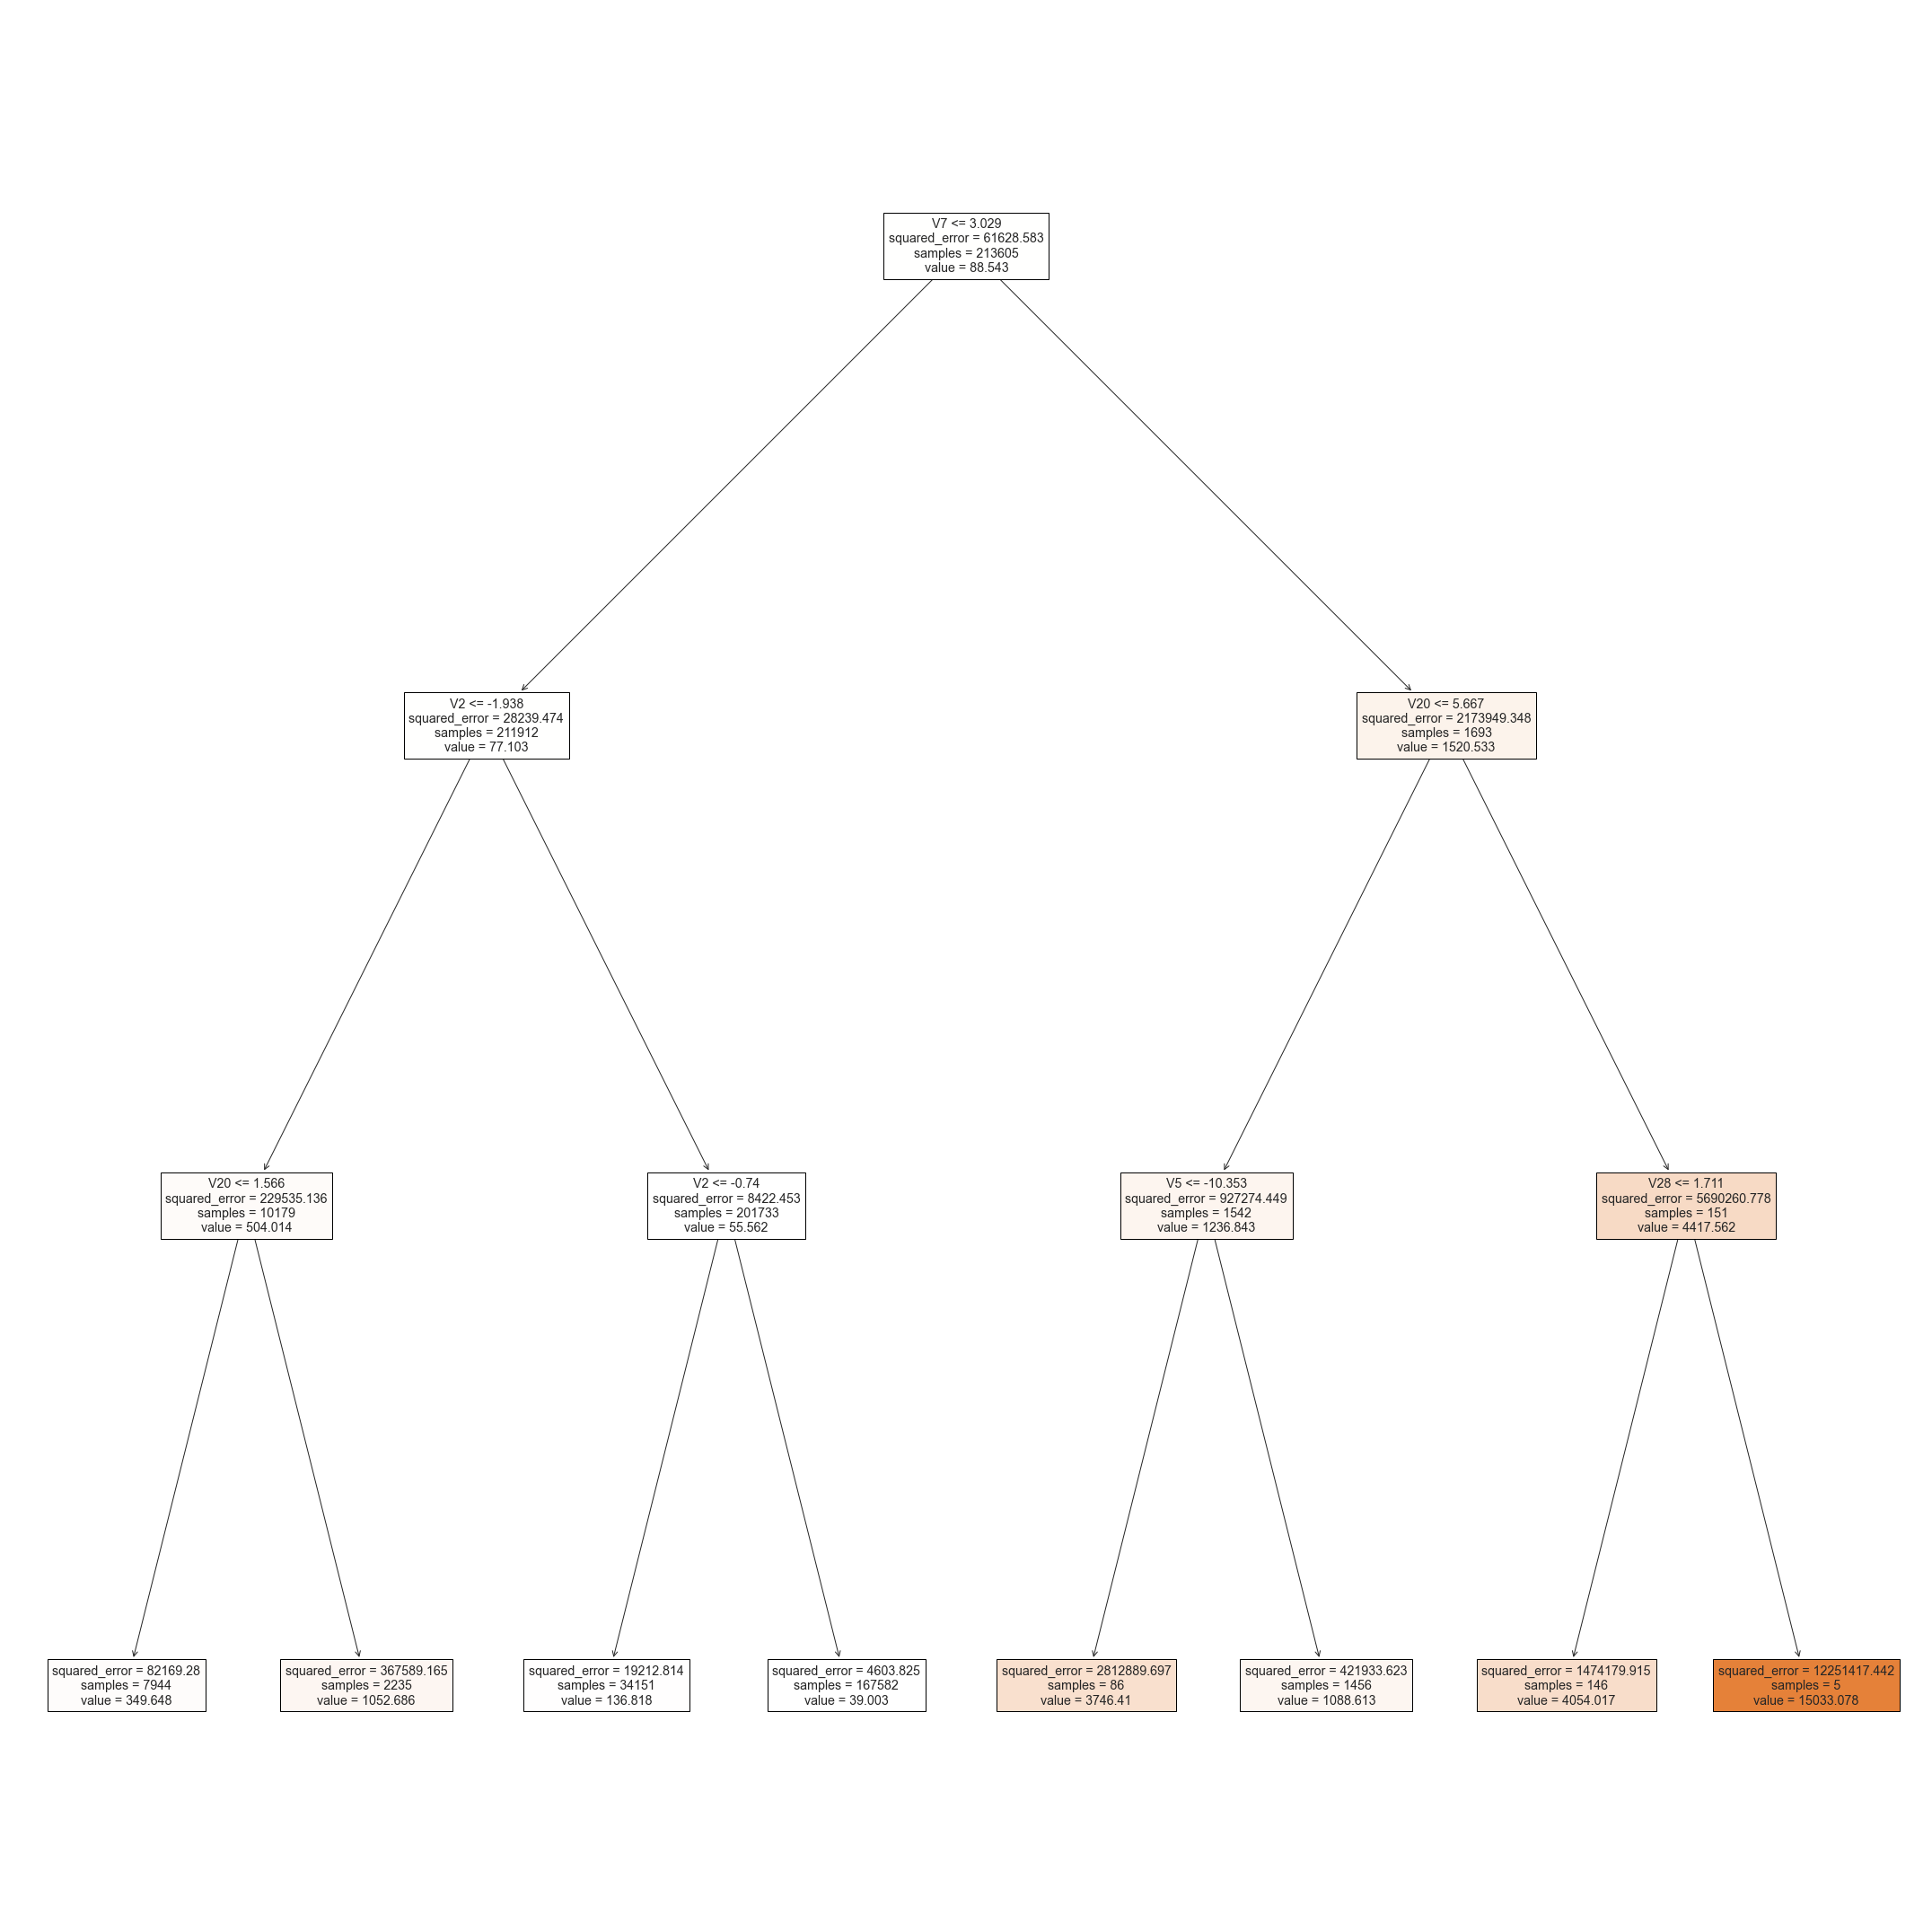

In [28]:
plt.figure(figsize=(30,30))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [29]:
# Extracting the importances by sklearn 
importances_sk = tree.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

feature_importance_df = pd.DataFrame({
    "Feature": features,
        "Feature importance": [feature_importance_sk[feature] for feature in features]})#.sort_values('Feature importance', ascending=False)
# Feature Importance
feature_importance_df = feature_importance_df.T
feature_importance_df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Feature,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
Feature importance,0.0,0.243,0.0,0.0,0.063,0.0,0.383,0.0,0.0,0.0,...,0.247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064,0.0


# DCS for Synthetic Data

In [30]:
X1, y1 =data_synthetic.drop("Amount", axis = 1), data_synthetic["Amount"]
features = X.columns.tolist()

In [31]:
#Spliting the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)

# Defining the hyper parameters 
hps = {
    'max_depth': 3,
    'min_samples_split': 4,
    'random_state': 0
}

# Loading the tree object 
tree1 = DecisionTreeRegressor(**hps)
#tree1= DecisionTreeClassifier()

# Fitting on the training data 
tree1.fit(X1_train, y1_train)

# Predicting the test set
y1_pred = tree1.predict(X1_test)

# Calculating the mean absolute error 
mae_train = mean_absolute_error(y1_train, tree.predict(X1_train)).round(2)
mae_test = mean_absolute_error(y1_test, y1_pred).round(2)

print(f"Mean absolute error on training set: {mae_train}")
print(f"Mean absolute error on test set: {mae_test}")

Mean absolute error on training set: 57.16
Mean absolute error on test set: 39.07


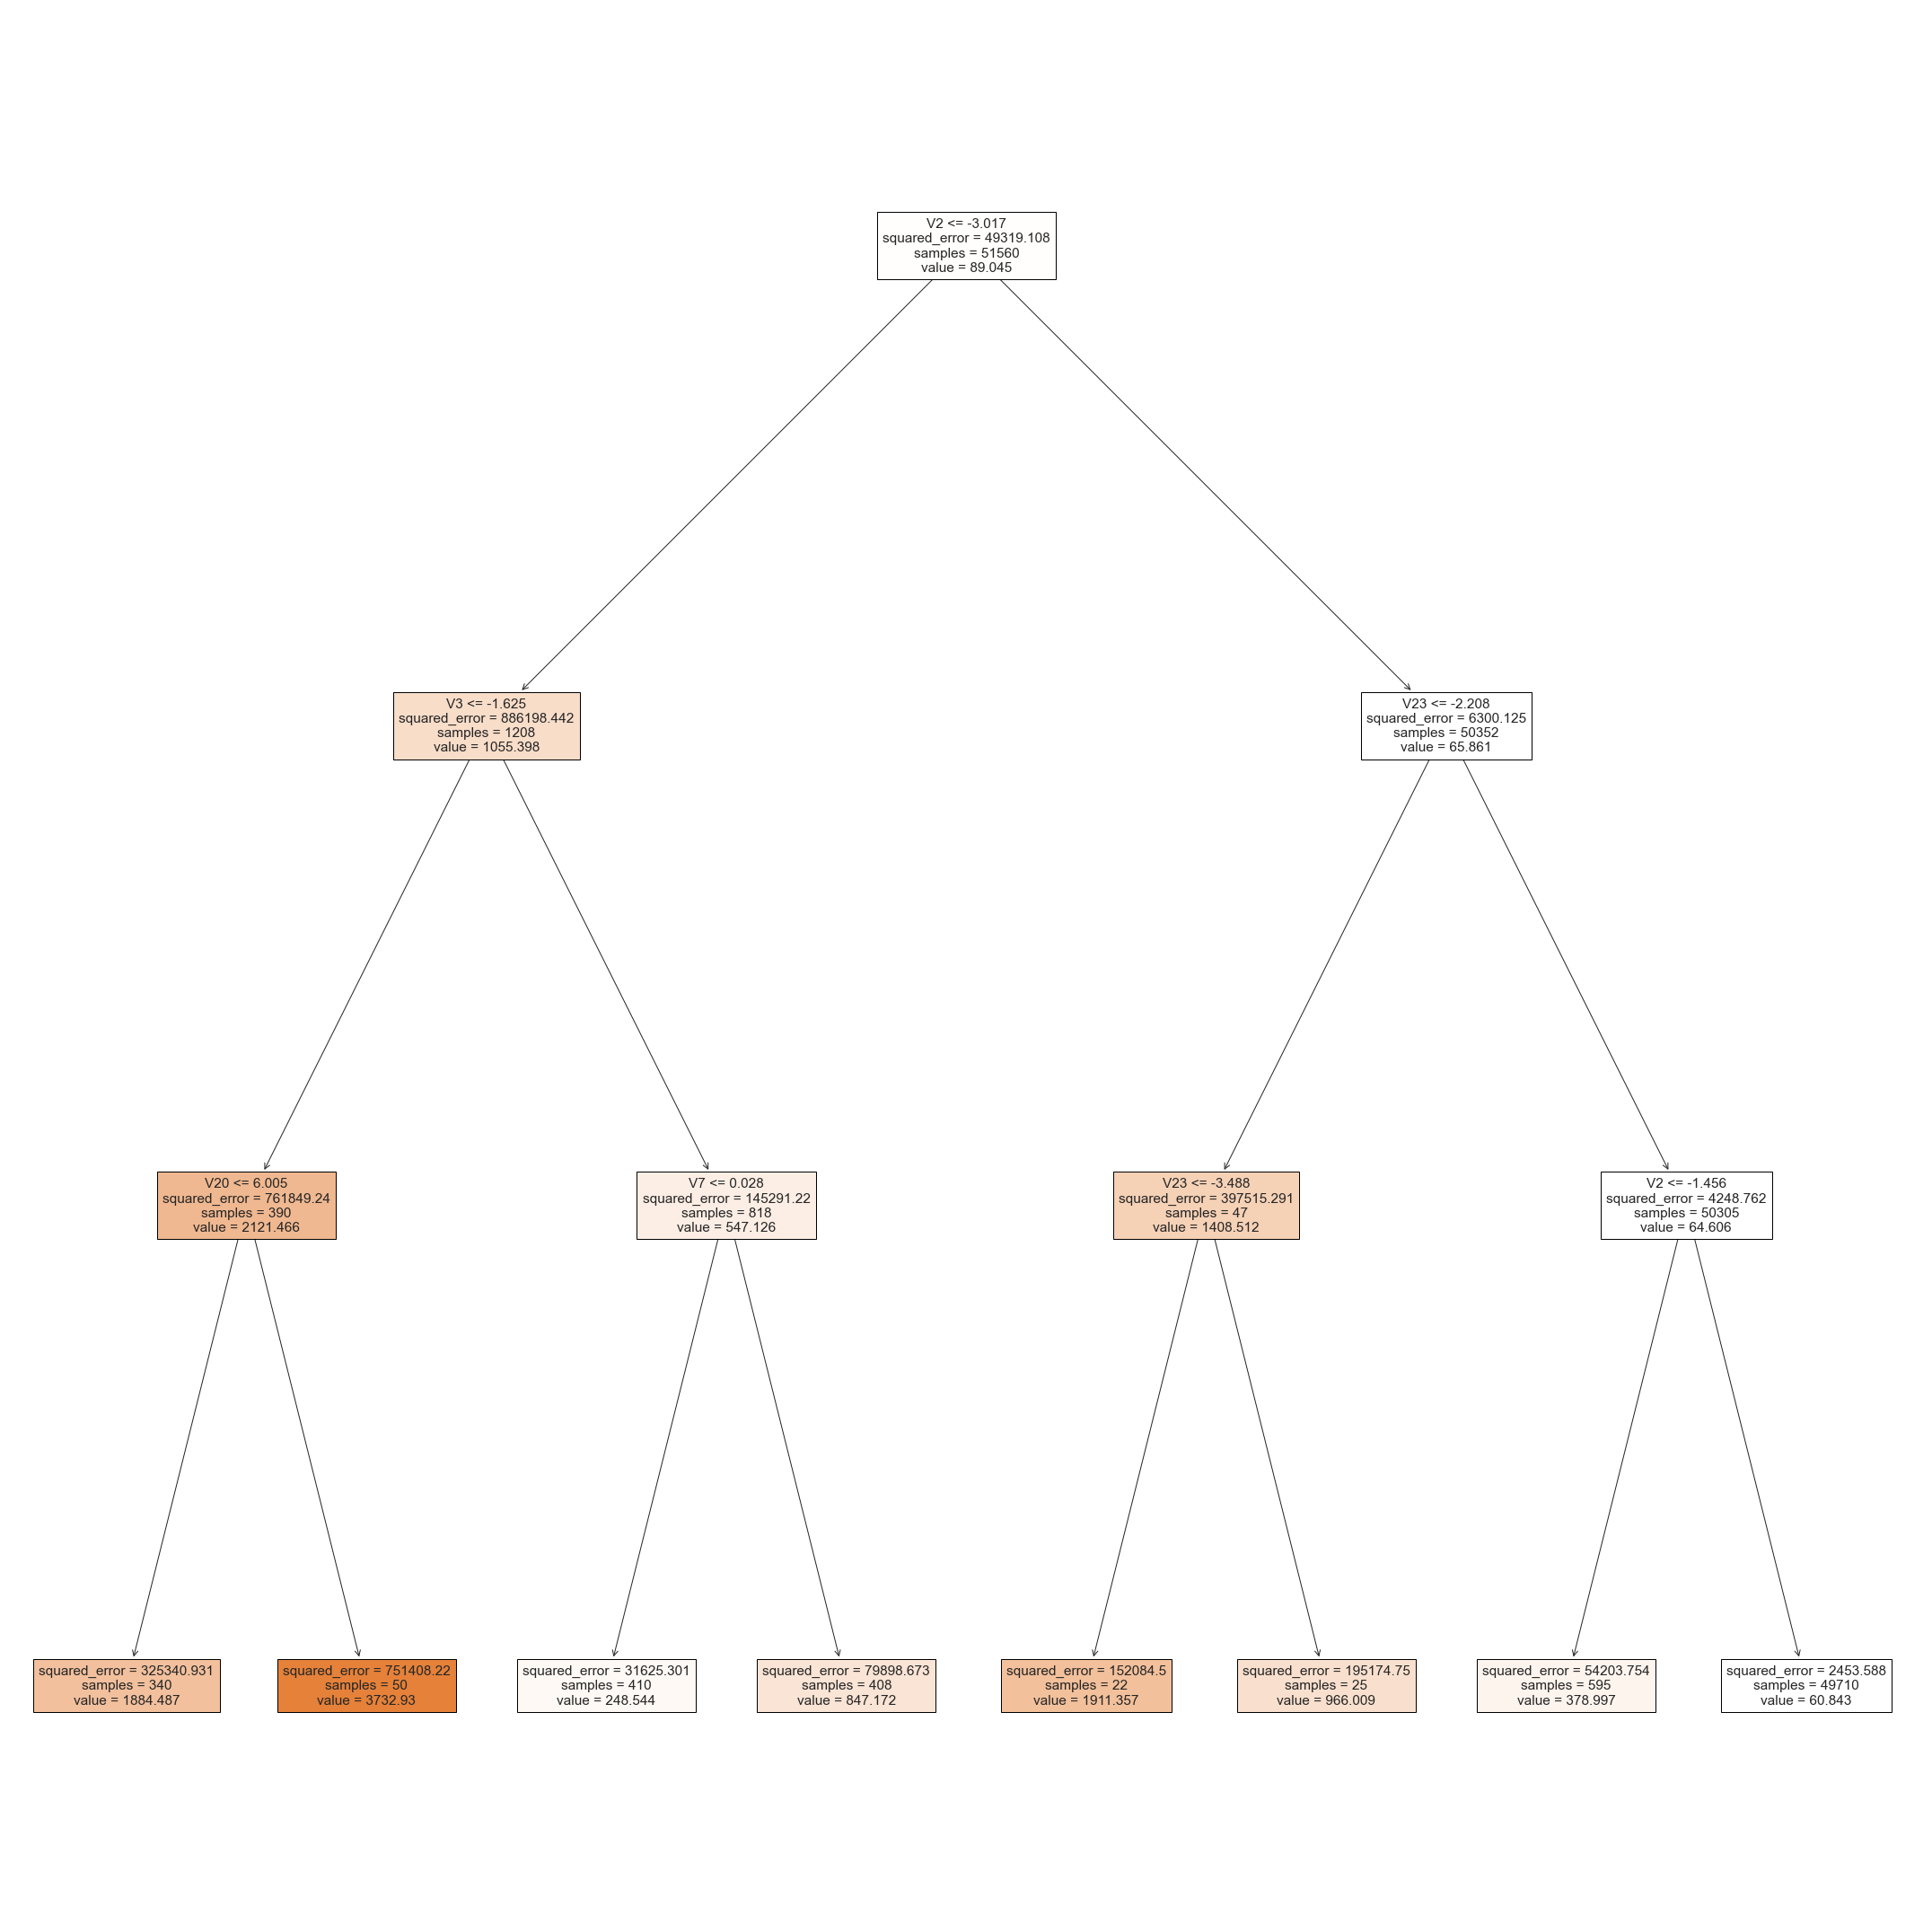

In [32]:
plt.figure(figsize=(30,30))
plot_tree(tree1, feature_names=features, filled=True)
plt.show()

In [33]:
# Extracting the importances by sklearn 
importances_sk = tree1.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)

feature_importance_df1 = pd.DataFrame({
#     "Feature_synth": features,
        "Feature importance_synth": [feature_importance_sk[feature] for feature in features]})#.sort_values('Feature importance_synth', ascending=False)
# Feature Importance
feature_importance_df1 = feature_importance_df1.T
feature_importance_df1

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Feature importance_synth,0.0,0.555,0.299,0.0,0.0,0.0,0.034,0.0,0.0,0.0,...,0.068,0.0,0.0,0.044,0.0,0.0,0.0,0.0,0.0,0.0


### Comparing Feature Importance of different Datasets

In [34]:
Combined = pd.concat([feature_importance_df,feature_importance_df1])
Combined = Combined.T
Combined

,Feature,Feature importance,Feature importance_synth
0,V1,0.0,0.0
1,V2,0.243,0.555
2,V3,0.0,0.299
3,V4,0.0,0.0
4,V5,0.063,0.0
5,V6,0.0,0.0
6,V7,0.383,0.034
7,V8,0.0,0.0
8,V9,0.0,0.0
9,V10,0.0,0.0


<AxesSubplot:>

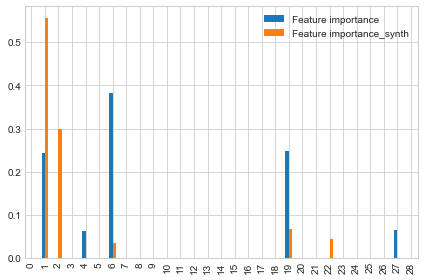

In [35]:
Combined.plot(kind= 'bar')

### Reset??
%reset

# USING ML

In [36]:
#Reset??
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


### Using Random Forest For Original Data

In [37]:
X, y =data_original.drop("Class", axis = 1), data_original["Class"]
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((199364, 29), (199364,), (85443, 29), (85443,))

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)

# Making predictions
predictions = rfc.predict(X_test)

In [39]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

# Classification Report, Confusion Matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.93      0.79      0.86       144

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

[[85291     8]
 [   30   114]]


In [40]:
print('Accuracy score:',accuracy_score(y_test,predictions))
print('ROC Accuracy:', roc_auc_score(y_test,predictions))

Accuracy score: 0.9995552590615966
ROC Accuracy: 0.8957864394658788


### Decision Tree for Original Data

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
# fit
dtc.fit(X_train,y_train)

# Making predictions
predictions_tree = dtc.predict(X_test)
# Let's check the report of our default model
print(classification_report(y_test,predictions_tree))

# Printing confusion matrix
print(confusion_matrix(y_test,predictions_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.78      0.78      0.78       144

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443

[[85268    31]
 [   32   112]]


In [42]:
print('Accuracy score:',accuracy_score(y_test,predictions_tree))
print('ROC Accuracy:', roc_auc_score(y_test,predictions_tree))

Accuracy score: 0.9992626663389628
ROC Accuracy: 0.8887071751525026


##### Using Default Hyperparameter as a Plus

# Using Random Forest for Synthetic Data

In [43]:
X_s, y_s =data_synthetic.drop("Class", axis = 1), data_synthetic["Class"]

# Splitting the data into train and test
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.30, random_state=101)
Xs_train.shape, ys_train.shape, Xs_test.shape, ys_test.shape

((48122, 29), (48122,), (20625, 29), (20625,))

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc1 = RandomForestClassifier()

# fit
rfc1.fit(X_train,y_train)

# Making predictions
predictions_s = rfc1.predict(Xs_test)

In [45]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

print(classification_report(ys_test,predictions_s))
print(confusion_matrix(ys_test,predictions_s))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20589
           1       0.62      0.97      0.76        36

    accuracy                           1.00     20625
   macro avg       0.81      0.99      0.88     20625
weighted avg       1.00      1.00      1.00     20625

[[20568    21]
 [    1    35]]


In [46]:
print('Accuracy score:',accuracy_score(ys_test,predictions_s))
print('ROC Accuracy:', roc_auc_score(ys_test,predictions_s))

Accuracy score: 0.9989333333333333
ROC Accuracy: 0.9856011300532648


### Using DecisionTree for Synthetic Data

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
# fit
dtc1.fit(Xs_train,ys_train)

# Making predictions
predictions_tree1 = dtc1.predict(Xs_test)
# Let's check the report of our default model
print(classification_report(ys_test,predictions_tree1))

# Printing confusion matrix
print(confusion_matrix(ys_test,predictions_tree1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20589
           1       0.97      1.00      0.99        36

    accuracy                           1.00     20625
   macro avg       0.99      1.00      0.99     20625
weighted avg       1.00      1.00      1.00     20625

[[20588     1]
 [    0    36]]


In [48]:
print('Accuracy score:',accuracy_score(ys_test,predictions_tree1))
print('ROC Accuracy:', roc_auc_score(ys_test,predictions_tree1))

Accuracy score: 0.9999515151515151
ROC Accuracy: 0.9999757151877217


 # +-------------------------------------------------------------------------------------------------------+

# PCA for Visualizing the Data
The Neural Network hyperparameters will be tuned using OPTUNA library
Similary >>https://www.kaggle.com/code/ludovicocuoghi/guide-on-unbalanced-datasets-smote-pca-and-nn


X = data_original.drop("Class",axis=1)
y = data_original.Class
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled);

the Neural Network did not perform too badly even if the dataset is unbalanced.
REF:

https://github.com/Olliang/Statistical-Similarity-Measurement

https://blog.keras.io/building-autoencoders-in-keras.html

https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f